### 1. Concept of Batch Normalization in the Context of Artificial Neural Networks

Batch normalization is a technique designed to improve the training of artificial neural networks by normalizing the inputs of each layer to reduce the internal covariate shift. Internal covariate shift refers to the changes in the distribution of inputs to a given layer during training, which can slow down the learning process. Batch normalization standardizes the inputs to a layer by scaling and shifting the inputs so that they have a mean of zero and a variance of one. This is done on a per-mini-batch basis, hence the name "batch normalization."

### 2. Benefits of Using Batch Normalization During Training

1. **Accelerated Training:** Batch normalization allows for higher learning rates by mitigating the risk of gradient explosion or vanishing gradients, leading to faster convergence.
2. **Improved Performance:** It often results in better overall performance, including higher accuracy and better generalization on unseen data.
3. **Reduced Sensitivity to Initialization:** Neural networks become less sensitive to the initial weights, which means that the model is more robust to different weight initializations.
4. **Regularization Effect:** It has a slight regularizing effect, which can reduce the need for other forms of regularization like dropout.

### 3. Working Principle of Batch Normalization

#### Normalization Step

1. **Compute Mean and Variance:** For each mini-batch, calculate the mean (\(\mu_B\)) and variance (\(\sigma_B^2\)) of the input features.
   \[
   \mu_B = \frac{1}{m} \sum_{i=1}^{m} x_i
   \]
   \[
   \sigma_B^2 = \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_B)^2
   \]
   where \(m\) is the number of examples in the mini-batch.

2. **Normalize:** Normalize the input by subtracting the mean and dividing by the standard deviation.
   \[
   \hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
   \]
   where \(\epsilon\) is a small constant added for numerical stability.

#### Learnable Parameters

Batch normalization introduces two learnable parameters per activation: a scaling factor (\(\gamma\)) and a shifting factor (\(\beta\)).

3. **Scale and Shift:** After normalization, the output is scaled by \(\gamma\) and shifted by \(\beta\).
   \[
   y_i = \gamma \hat{x}_i + \beta
   \]
   The parameters \(\gamma\) and \(\beta\) are learned during the training process, allowing the network to undo the normalization if that is the optimal thing to do for the learning task.


# Without Batch Normalization

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
# Normalizing the data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32') /255

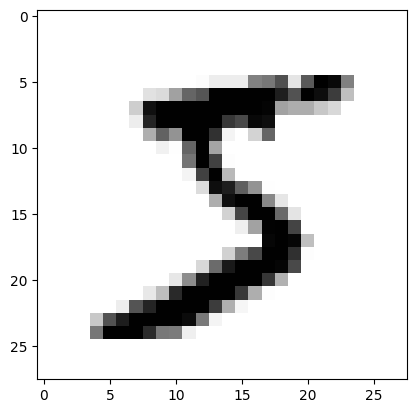

In [6]:
# Visualizing the data
plt.imshow(x_train[0],cmap='binary')
plt.show()

In [7]:
# Creating a model
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [9]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6573 - accuracy: 0.8235 - val_loss: 0.3157 - val_accuracy: 0.9121
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2945 - accuracy: 0.9162 - val_loss: 0.2507 - val_accuracy: 0.9284
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2416 - accuracy: 0.9320 - val_loss: 0.2141 - val_accuracy: 0.9391
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2070 - accuracy: 0.9413 - val_loss: 0.1860 - val_accuracy: 0.9462
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1815 - accuracy: 0.9482 - val_loss: 0.1652 - val_accuracy: 0.9523
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1614 - accuracy: 0.9542 - val_loss: 0.1519 - val_accuracy: 0.9553
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1456 - accuracy: 0.9588 - val_loss: 0.1379 - val_accuracy:

In [11]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1145 - accuracy: 0.9663
0.11449050158262253
0.9663000106811523


In [12]:
import tensorflow as tf

# Example neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Adding batch normalization layers
model.add(tf.keras.layers.BatchNormalization())  # Batch normalization after the first dense layer
model.add(tf.keras.layers.BatchNormalization())  # Batch normalization after the second dense layer

# Compile the model
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Example of training the model
# Replace with your dataset and training code
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1, 784)) / 255.0
x_test = x_test.reshape((-1, 784)) / 255.0

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5243 - accuracy: 0.7258 - val_loss: 3.0261 - val_accuracy: 0.6472
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.1103 - accuracy: 0.2679 - val_loss: 6.4085 - val_accuracy: 0.1032
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 6.4107 - accuracy: 0.0993 - val_loss: 6.4034 - val_accuracy: 0.1032
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 6.4105 - accuracy: 0.0993 - val_loss: 6.4031 - val_accuracy: 0.1032
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 6.4104 - accuracy: 0.0993 - val_loss: 6.4032 - val_accuracy: 0.1032
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 6.4105 - accuracy: 0.0993 - val_loss: 6.4027 - val_accuracy: 0.1032
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 6.4104 - accuracy: 0.0993 - val_loss: 6.4033 - val_accuracy:

In [13]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 6.4034 - accuracy: 0.1032
6.403357982635498
0.10320000350475311


After looking at the above result we can say that we got less accuracy after introducing Batch Normalization this could have happened due to various reasons.

### 1. Experimenting with Different Batch Sizes

Batch size is an important hyperparameter in training neural networks, and it can significantly impact the training dynamics and model performance when using batch normalization. Here’s how different batch sizes can affect training:

- **Effect on Training Dynamics:**
  - **Smaller Batch Sizes (e.g., 32)**: Training with smaller batches tends to introduce more noise into the gradient estimation because the gradients computed from each mini-batch are noisier due to smaller sample sizes. This noise can sometimes act as a regularization effect, preventing overfitting but might lead to slower convergence.
  - **Larger Batch Sizes (e.g., 128, 256)**: Larger batches provide a more accurate estimate of the gradient because they average out the noise from individual examples. This can lead to faster convergence and more stable training dynamics.

- **Effect on Model Performance:**
  - **Accuracy and Generalization:** In general, larger batch sizes can lead to slightly better generalization performance because they provide a smoother gradient estimate, allowing the model to learn more effectively from each mini-batch.
  - **Training Speed:** Larger batch sizes often lead to faster training per epoch since more computations are done in parallel. However, this depends on the hardware capabilities and the specific neural network architecture.

### 2. Advantages and Potential Limitations of Batch Normalization

#### Advantages:

- **Accelerated Training:** Batch normalization allows for faster convergence during training by stabilizing and normalizing the inputs to each layer.
- **Improved Gradient Flow:** It helps in mitigating issues like vanishing or exploding gradients, allowing for the use of higher learning rates.
- **Regularization:** Batch normalization has a slight regularization effect, reducing the need for dropout and other regularization techniques.
- **Stable Training:** It reduces internal covariate shift, making the training process more stable and less sensitive to weight initialization.

#### Potential Limitations:

- **Batch Size Dependency:** Batch normalization performance can depend on batch size. Very small batch sizes may lead to inaccurate batch statistics, affecting performance.
- **Computation Overhead:** During inference, batch normalization requires computing and maintaining running averages of mean and variance, which adds computational overhead.
- **Performance in Small Batches:** In some cases, batch normalization might not perform optimally with very small batch sizes due to noisy estimates of mean and variance.
- **Domain Specific Tuning:** The effectiveness of batch normalization can vary across different types of networks and datasets, requiring specific tuning for optimal performance.

